# Univariate Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/processed/earthquake_analysis_ready.csv")

df["date"] = pd.to_datetime(df["date"], utc=True)
df["date"] = df["date"].dt.tz_convert("America/Lima")

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 25122 entries, 0 to 25121
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype                       
---  ------          --------------  -----                       
 0   date            25122 non-null  datetime64[us, America/Lima]
 1   depth           25122 non-null  int64                       
 2   magnitude       25122 non-null  float64                     
 3   year            25122 non-null  int64                       
 4   month           25122 non-null  int64                       
 5   day             25122 non-null  int64                       
 6   hour            25122 non-null  int64                       
 7   department      25122 non-null  str                         
 8   longitude       25122 non-null  float64                     
 9   latitude        25122 non-null  float64                     
 10  region          25122 non-null  str                         
 11  type_magnitude  25122 non-null  str    

## Date

* Year

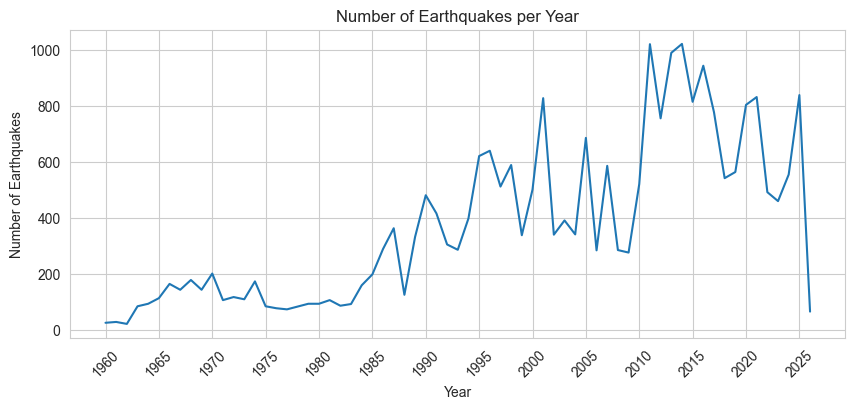

In [22]:
df_count_by_year = df.groupby("year").size().reset_index(name="count")

fig, ax = plt.subplots(figsize=(10, 4))

sns.lineplot(data=df_count_by_year, x="year", y="count")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Number of Earthquakes per Year")
plt.xticks(
    np.arange(df_count_by_year["year"].min(),
              df_count_by_year["year"].max()+1,
              5),
    rotation=45
)
plt.savefig("../reports/figures/univariate_analysis/date/earthquakes_per_year.png", dpi=300, bbox_inches="tight")
plt.show()

* Decade

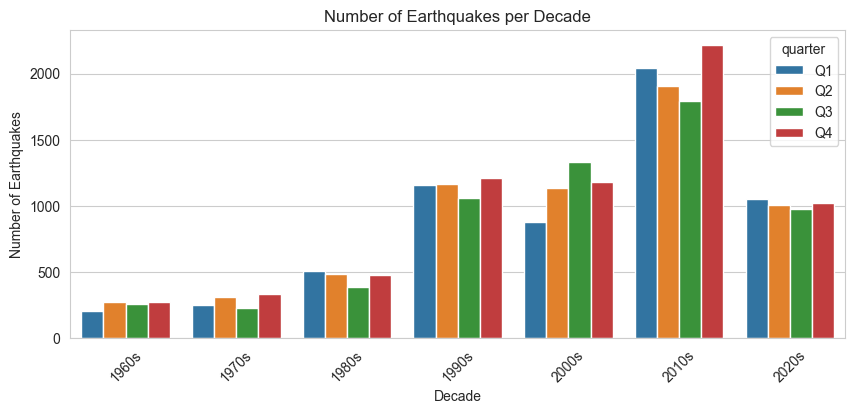

In [23]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 4))

sns.countplot(data=df, x="decade", hue="quarter")

plt.xticks(rotation=45)
plt.xlabel("Decade")
plt.ylabel("Number of Earthquakes")
plt.title("Number of Earthquakes per Decade")
plt.savefig("../reports/figures/univariate_analysis/date/earthquakes_per_decade.png", dpi=300, bbox_inches="tight")

plt.show()

* Month

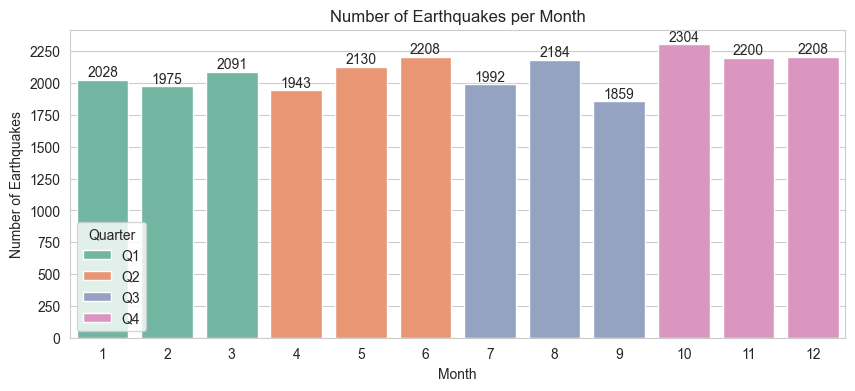

In [24]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 4))

sns.countplot(data=df, x="month", hue="quarter", palette="Set2")

for container in ax.containers:
    ax.bar_label(container)

plt.yticks(np.arange(0, df["month"].value_counts().max() + 1, 250))
plt.xlabel("Month")
plt.ylabel("Number of Earthquakes")
plt.title("Number of Earthquakes per Month")
plt.legend(title="Quarter")

plt.savefig("../reports/figures/univariate_analysis/date/earthquakes_per_month.png", dpi=300, bbox_inches="tight")

plt.show()

* Day

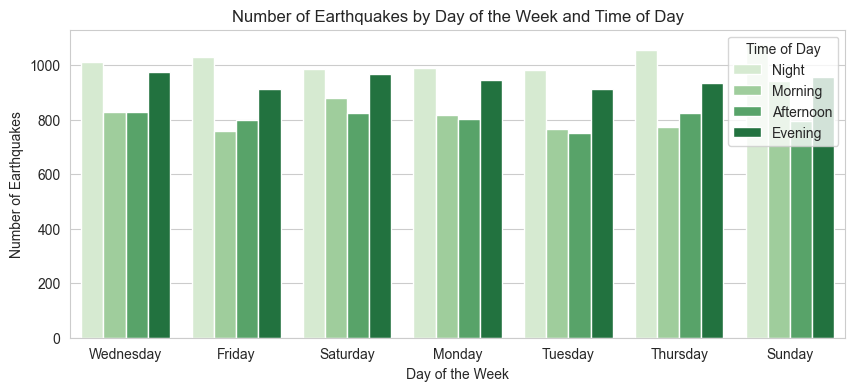

In [25]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 4))

sns.countplot(
    data=df, 
    x="day_of_week", 
    hue="time_of_day",
    hue_order=["Night", "Morning", "Afternoon", "Evening"], 
    palette="Greens"
)

plt.xlabel("Day of the Week")
plt.ylabel("Number of Earthquakes")
plt.title("Number of Earthquakes by Day of the Week and Time of Day")
plt.legend(title="Time of Day")

plt.savefig("../reports/figures/univariate_analysis/date/earthquakes_by_day_time.png", dpi=300, bbox_inches="tight")

plt.show()

## Depth

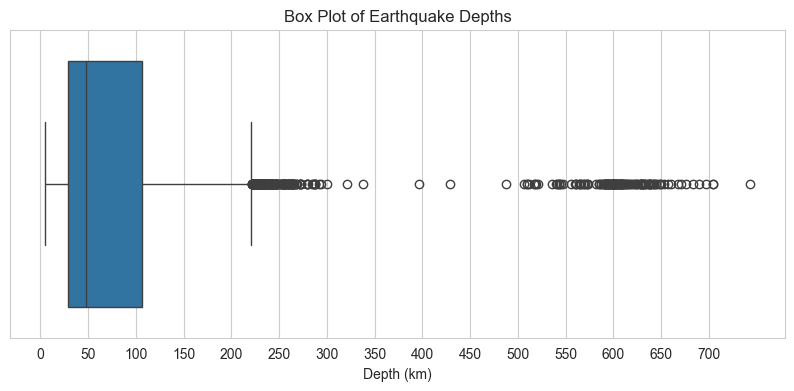

In [26]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 4))

sns.boxplot(data=df, x='depth', ax=ax)
plt.xlabel("Depth (km)")
plt.xticks(np.arange(0, df["depth"].max() + 1, 50))
plt.title("Box Plot of Earthquake Depths")

plt.savefig("../reports/figures/univariate_analysis/depth/boxplot_depth.png", dpi=300, bbox_inches="tight")

plt.show()


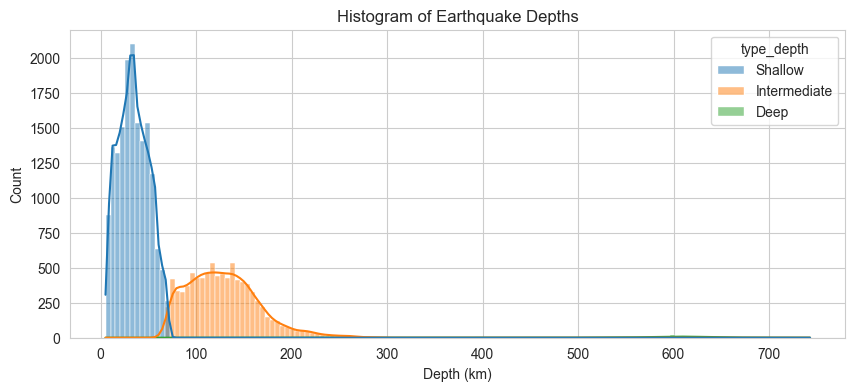

In [48]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10,4))

sns.histplot(data=df, x='depth', hue='type_depth', kde=True, ax=ax)
plt.xlabel("Depth (km)")
plt.title("Histogram of Earthquake Depths")

plt.savefig("../reports/figures/univariate_analysis/depth/histogram_depth.png", dpi=300, bbox_inches="tight")

plt.show()

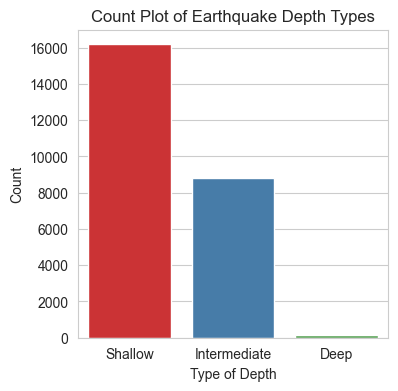

In [28]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(data=df, x="type_depth", hue="type_depth", ax=ax, palette="Set1")

plt.xlabel("Type of Depth")
plt.ylabel("Count")
plt.title("Count Plot of Earthquake Depth Types")

plt.savefig("../reports/figures/univariate_analysis/depth/countplot_type_depth.png", dpi=300, bbox_inches="tight")

plt.show()

## Magnitude

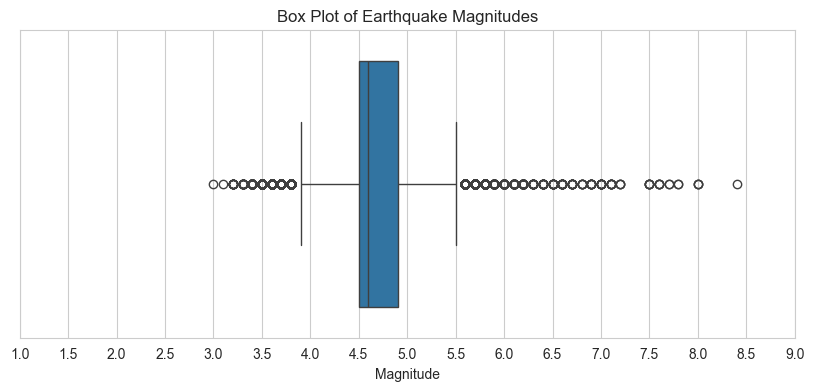

In [54]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 4))

sns.boxplot(data=df, x='magnitude', ax=ax)
plt.xlabel("Magnitude")
plt.xticks(np.arange(1, df["magnitude"].max() + 1, 0.5))
plt.title("Box Plot of Earthquake Magnitudes")

plt.savefig("../reports/figures/univariate_analysis/magnitude/boxplot_magnitude.png", dpi=300, bbox_inches="tight")

plt.show()

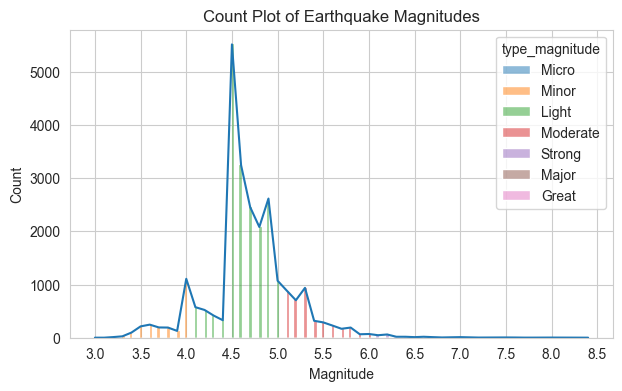

In [79]:
count_by_magnitude = df["magnitude"].value_counts().reset_index()
count_by_magnitude.columns = ["magnitude", "count"]

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=[7,4])

sns.lineplot(data=count_by_magnitude, x="magnitude", y="count",ax=ax)
sns.histplot(data=df, x="magnitude", hue="type_magnitude", hue_order=["Micro", "Minor", "Light", "Moderate", "Strong", "Major", "Great"], ax=ax)

plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.xticks(np.arange(3, df["magnitude"].max() + 0.5, 0.5))
plt.title("Count Plot of Earthquake Magnitudes")

plt.savefig("../reports/figures/univariate_analysis/magnitude/countplot_magnitude.png", dpi=300, bbox_inches="tight")

plt.show()

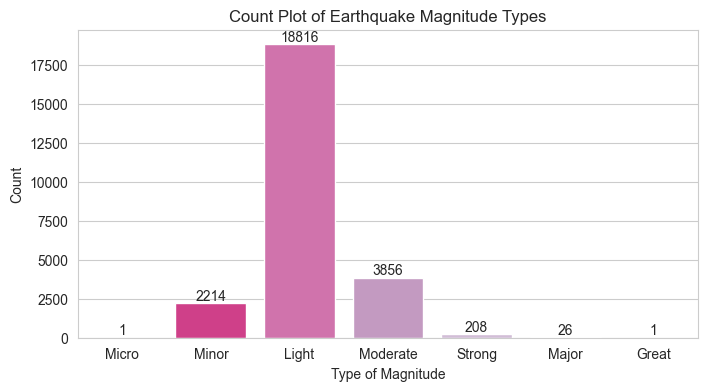

In [ ]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8,4))

sns.countplot(
    data=df, 
    x="type_magnitude", 
    hue="type_magnitude", 
    order = ["Micro", "Minor", "Light", "Moderate", "Strong", "Major", "Great"], 
    ax=ax, 
    palette="PuRd")

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Type of Magnitude")
plt.ylabel("Count")
plt.title("Count Plot of Earthquake Magnitude Types")

plt.savefig("../reports/figures/univariate_analysis/magnitude/countplot_type_magnitude.png", dpi=300, bbox_inches="tight")

plt.show()

## Location

* Department

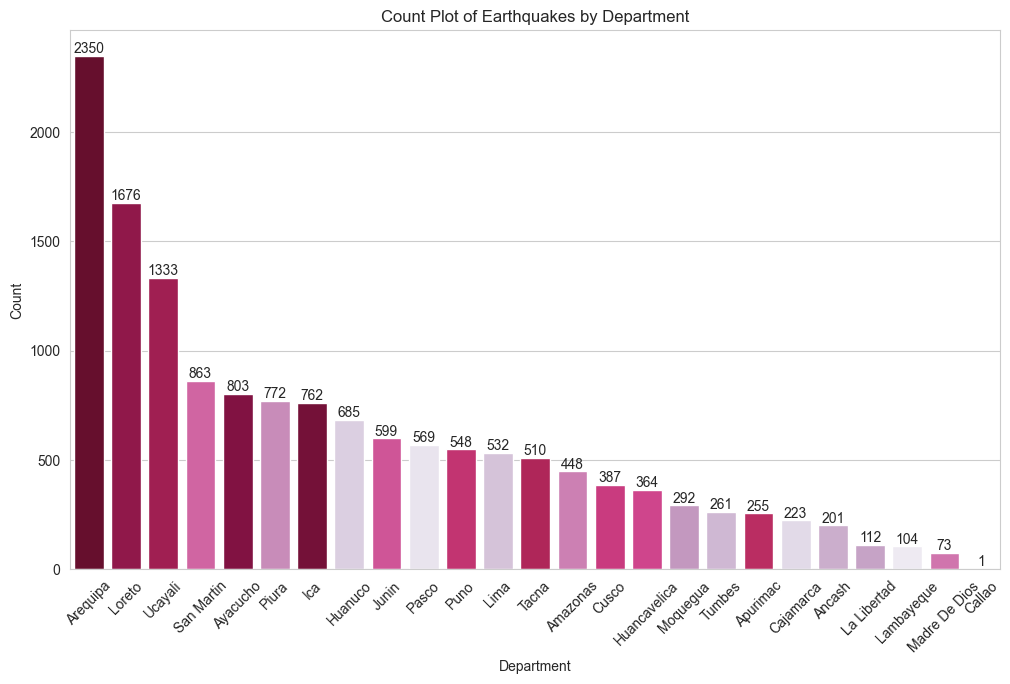

In [86]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(12, 7))

df_inside_peru = df[df["department"] != "Surroundings"]

sns.countplot(
    data=df_inside_peru, 
    x="department", 
    hue="department", 
    ax=ax, 
    palette="PuRd_r", 
    order=df_inside_peru["department"].value_counts().index
)

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Count Plot of Earthquakes by Department")
plt.xticks(rotation=45)

plt.savefig("../reports/figures/univariate_analysis/location/countplot_department.png", dpi=300, bbox_inches="tight")

plt.show()

* Region

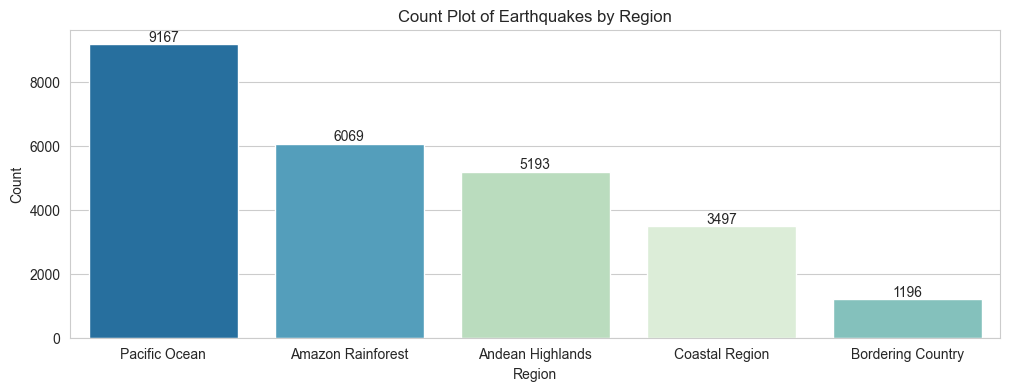

In [33]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(12, 4))

sns.countplot(
    data=df, 
    x="region", 
    hue="region", 
    ax=ax, 
    palette="GnBu", 
    order=df["region"].value_counts().index
)

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Count Plot of Earthquakes by Region")

plt.savefig("../reports/figures/univariate_analysis/location/countplot_region.png", dpi=300, bbox_inches="tight")

plt.show()